In [1]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

from os.path import exists 

import gdown
import zipfile

### Data Loading

In [3]:
# Download the data if it doesn't exists locally already
def download_device_data(url:str, filename:str):
    file_exists = exists('/data/' + filename) 
    if file_exists==False:
        output = 'data/' + filename + '.zip'
        gdown.download(url, output, quiet=False, fuzzy=True)

        # Unzip the data 
        with zipfile.ZipFile(output, 'r') as zip_ref:
            zip_ref.extractall('data/')
    return None

In [4]:
urls = ['https://drive.google.com/file/d/1QC6afqmWSHNpgsoe7j7g4E3YaYoHqeIt/view?usp=sharing', 
        'https://drive.google.com/file/d/1Y_m2Awl9161Rs-7xiXbQKV7NOsDI6DI5/view?usp=sharing', 
        'https://drive.google.com/file/d/1-mayhsGwpSnSHQYDRUDT2bY9EFSrrpOZ/view?usp=sharing',
        'https://drive.google.com/file/d/10USDOONYDPo8BAY46qhQOAPdpwnC1S4D/view?usp=sharing'
       ]
filenames = ['devices1.csv',
            'devices2.csv',
            'devices3.csv',
            'devices4.csv',
           ]
for url, filename in zip(urls, filenames):
    download_device_data(url, filename)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1QC6afqmWSHNpgsoe7j7g4E3YaYoHqeIt 



FileNotFoundError: [Errno 2] No such file or directory: 'data/devices1.csv.zip'

In [ ]:
# Example of how to load times series csv file
# Each file contains data from approximately 50 devices
ts_df = pd.read_csv('data/devices1.csv')

In [ ]:
ts_df.columns

Index(['battery_voltage', 'current', 'current_in', 'current_out',
       'panel_voltage', 'state_of_charge_percent', 'temperature', 'timestamp',
       'usb_current', 'voltage', 'battery_id'],
      dtype='object')

#### Data Frame Columns

 `current_out`: current withdrawn from the box by the consumer <br>
 `current_in`: current supplied to the box from the solar panel <br>
 `current`: `current_out` - `current-in` --> net current that goes in or out of the battery <br>
 `temperature`: temperature in deg C <br>
 `timestamp`: YYYY-MM-DD HH:MM:SS <br>
 `panel_voltage`: voltage of the battery in V <br>
 `state_of_charge_percent`: state of charge of the battery in percent <br>
 `battery_id`: unique identifier of the battery <br>

In [ ]:
ts_df.loc[ts_df["battery_id"]==0].loc[:1000,:]

,battery_voltage,current,current_in,current_out,panel_voltage,state_of_charge_percent,temperature,timestamp,usb_current,voltage,battery_id
0,7.090,-2.542,2.544,0.002,7.240,NaN,NaN,2021-03-02 06:33:24,0.002,7.185,0
1,7.100,-2.548,2.550,0.002,7.245,NaN,NaN,2021-03-02 06:35:24,0.002,7.190,0
2,7.095,-2.472,2.474,0.002,7.275,NaN,NaN,2021-03-02 06:37:24,0.002,7.215,0
3,7.070,-2.232,2.236,0.004,7.370,NaN,NaN,2021-03-02 06:39:24,0.002,7.290,0
4,7.075,-2.276,2.278,0.002,7.350,100.0,28.287938,2021-03-02 06:41:24,0.002,7.280,0
...,...,...,...,...,...,...,...,...,...,...,...
996,6.675,-0.192,0.200,0.008,6.680,NaN,NaN,2021-03-03 15:22:55,0.002,6.695,0
997,6.675,-0.182,0.190,0.008,6.675,54.0,24.479286,2021-03-03 15:23:52,0.002,6.695,0
998,6.675,-0.174,0.182,0.008,6.675,NaN,NaN,2021-03-03 15:25:46,0.002,6.695,0
999,6.670,-0.162,0.170,0.008,6.670,NaN,NaN,2021-03-03 15:27:46,0.002,6.690,0


### Plotting

In [6]:
# Basic plot of the data
plt.rcParams['figure.figsize'] = [16, 6]
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

start_pidx = 0 
end_pidx = 6000 

dates = matplotlib.dates.date2num(ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "timestamp"])
current = ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "current"]
voltage = ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "battery_voltage"]

fig, host = plt.subplots()
par1 = host.twinx()

p1, = host.plot(dates, current, 'b', label='Current')
p2, = par1.plot(dates, voltage, 'r', label='Voltage')

host.set_ylabel('Current (A)')
par1.set_ylabel('Voltage (V)')
host.set_xlabel('Date')

host.xaxis.set_major_locator(xtick_locator)
host.xaxis.set_major_formatter(xtick_formatter)
fig.autofmt_xdate()

lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines], loc=1, bbox_to_anchor=(0.995,0.22))


NameError: name 'ts_df' is not defined

## Data Preprocessing

In [2]:
all_df = pd.read_csv('data/devices1.csv')
for i in range(1,4):
    curr_file_name = 'data/devices' + str(i+1) + '.csv'
    curr_df = pd.read_csv(curr_file_name)
    all_df = pd.concat([all_df, curr_df])

In [3]:
all_df.loc[:,'battery_id'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
# convert ts_df into a data set indexed by battery id
max_id = all_df.loc[:,'battery_id'].max()
all_samples = []
for id in range(max_id):
    curr_sample = all_df.groupby('battery_id').get_group(id)
    # curr_sample = curr_sample.set_index('timestamp')
    curr_sample.loc[:,'timestamp'] = pd.to_datetime(curr_sample.loc[:,'timestamp'])
    curr_sample.reset_index(drop=True, inplace=True)
    curr_sample.drop('battery_id',axis=1,inplace=True)
    all_samples.append(curr_sample)

all_samples[0].head()

C:\Users\sann7383\Anaconda3\envs\pytorchAI\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\sann7383\Anaconda3\envs\pytorchAI\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,battery_voltage,current,current_in,current_out,panel_voltage,state_of_charge_percent,temperature,timestamp,usb_current,voltage
0,7.090,-2.542,2.544,0.002,7.240,NaN,NaN,2021-03-02 06:33:24,0.002,7.185
1,7.100,-2.548,2.550,0.002,7.245,NaN,NaN,2021-03-02 06:35:24,0.002,7.190
2,7.095,-2.472,2.474,0.002,7.275,NaN,NaN,2021-03-02 06:37:24,0.002,7.215
3,7.070,-2.232,2.236,0.004,7.370,NaN,NaN,2021-03-02 06:39:24,0.002,7.290
4,7.075,-2.276,2.278,0.002,7.350,100.0,28.287938,2021-03-02 06:41:24,0.002,7.280


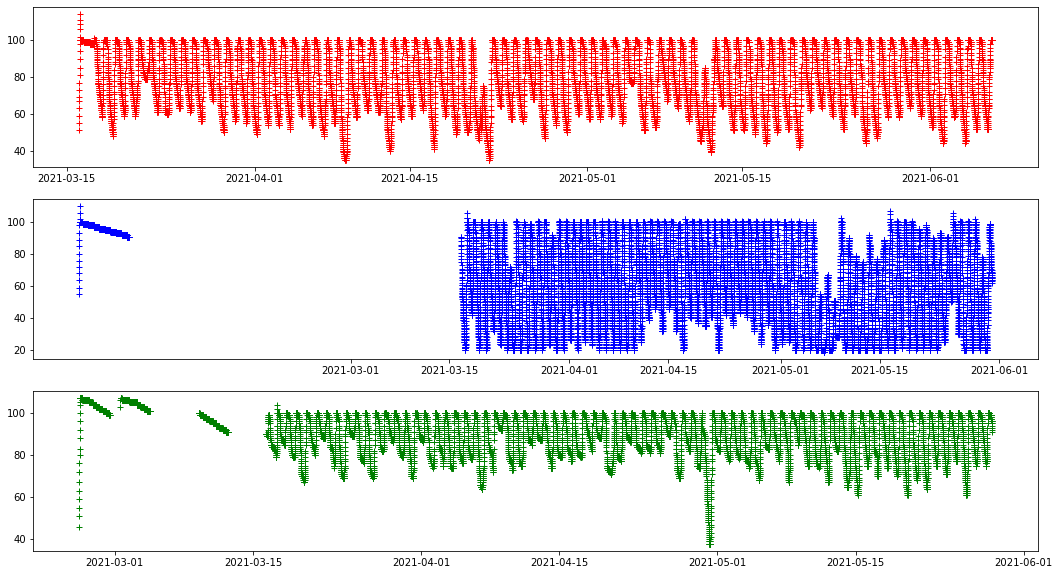

In [83]:
fig, (ax1,ax2,ax3) = plt.subplots(3)
start_pidx = 0 
end_pidx = 60000 
index1 = 28
index2 = 111
index3 = 193
dates1 = matplotlib.dates.date2num(all_samples[index1].loc[start_pidx:end_pidx, "timestamp"])
current1 = all_samples[index1].loc[start_pidx:end_pidx, "state_of_charge_percent"].values

dates2 = matplotlib.dates.date2num(all_samples[index2].loc[start_pidx:end_pidx, "timestamp"])
current2 = all_samples[index2].loc[start_pidx:end_pidx, "state_of_charge_percent"].values

dates3 = matplotlib.dates.date2num(all_samples[index3].loc[start_pidx:end_pidx, "timestamp"])
current3 = all_samples[index3].loc[start_pidx:end_pidx, "state_of_charge_percent"].values

ax1.plot(dates1,current1,'r+',label='0')
ax2.plot(dates2,current2,'b+',label='10')
ax3.plot(dates3,current3,'g+',label='100')

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax2.xaxis.set_major_locator(xtick_locator)
ax2.xaxis.set_major_formatter(xtick_formatter)

ax3.xaxis.set_major_locator(xtick_locator)
ax3.xaxis.set_major_formatter(xtick_formatter)

In [8]:
# check if every sample have the date 2021-04-5 (Monday)
# this cell may take dozens of minutes
judge_list = np.zeros([len(all_samples),1])
index_list = np.zeros([len(all_samples),1])
for i in range(len(all_samples)):
    for ii in range(len(all_samples[i])):
        years = all_samples[i].loc[:,'timestamp'][ii].year
        months = all_samples[i].loc[:,'timestamp'][ii].month
        days = all_samples[i].loc[:,'timestamp'][ii].day
        if years == 2021 and months == 4 and days == 5:
            index_list[i] = ii
            judge_list[i] = 1
            break


In [40]:
# index_list = index_list.astype(int)
# index_df = pd.Series(index_list.ravel())
# index_df.to_csv('index_4_5_2021.csv')
index_list = pd.read_csv('index_4_5_2021.csv',index_col=0).values

In [17]:
# A baseline model on a week's current curves
dur_time = 7*24*30
week_all_data = []

for i,index in enumerate(index_list):
    index = int(index)
    curr_data = all_samples[i].loc[index:index+dur_time,'current'].values
    week_all_data.append(curr_data)

week_all_data = np.asarray(week_all_data)

In [74]:
from tslearn.clustering import TimeSeriesKMeans

km = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=50,
                        random_state=0).fit(week_all_data)
km.cluster_centers_.shape

(6, 5041, 1)

In [84]:
km_dtw = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=1,
                        random_state=0).fit(week_all_data)
km_dtw.cluster_centers_.shape

(6, 5041, 1)

In [76]:
y_pred = km.predict(week_all_data)
(uniques,counts) = np.unique(y_pred, return_counts=True)
counts

C:\Users\sann7383\Anaconda3\envs\pytorchAI\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 199 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([35, 24, 43, 35, 42, 20], dtype=int64)

In [77]:
index0 = int(index_list[0])
date_time =  all_samples[0].loc[index0:index0+dur_time,'timestamp']
date_time

24596   2021-04-05 00:01:42
24597   2021-04-05 00:03:42
24598   2021-04-05 00:05:42
24599   2021-04-05 00:07:42
24600   2021-04-05 00:09:39
                ...        
29632   2021-04-11 21:45:14
29633   2021-04-11 21:47:10
29634   2021-04-11 21:49:10
29635   2021-04-11 21:51:10
29636   2021-04-11 21:53:10
Name: timestamp, Length: 5041, dtype: datetime64[ns]

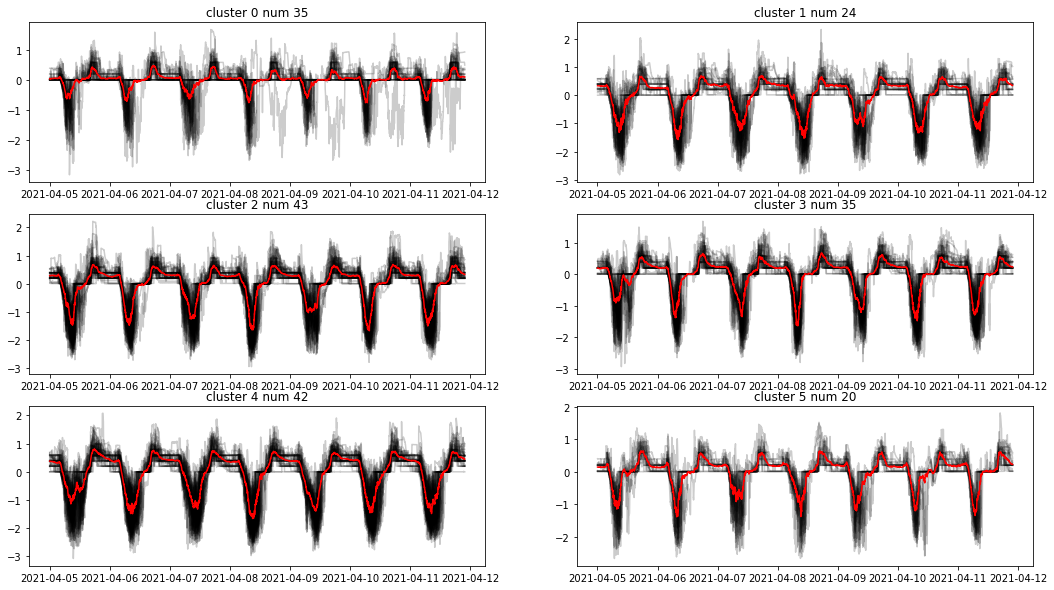

In [79]:

plt.rcParams['figure.figsize'] = [18, 10]
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in week_all_data[y_pred == yi]: 
        plt.plot_date(date_time,xx.ravel(), "k-", alpha=.2)
    plt.plot_date(date_time,km.cluster_centers_[yi].ravel(), "r-")
    plt.title('cluster '+str(yi)+' num '+str(counts[yi]))
    # plt.gcf().autofmt_xdate()

In [ ]:
y_pred_dtw = km_dtw.predict(week_all_data)
(uniques,counts) = np.unique(y_pred_dtw, return_counts=True)
plt.rcParams['figure.figsize'] = [18, 10]
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in week_all_data[y_pred_dtw == yi]: 
        plt.plot_date(date_time,xx.ravel(), "k-", alpha=.2)
    plt.plot_date(date_time,km_dtw.cluster_centers_[yi].ravel(), "r-")
    plt.title('cluster '+str(yi)+' num '+str(counts[yi]))